In [2]:
import pandas as pd
import numpy as np
# Please xcoos me inglis

In [3]:
life_data = pd.read_csv('Life Expectancy Data.csv')
# Link to data =>
# https://www.kaggle.com/kumarajarshi/life-expectancy-who
# kaggle datasets download -d kumarajarshi/life-expectancy-who
# TO-DO: TRY AND MAKE IT ACCESSIBLE STRAIGHT FROM THE URL

# Step 1 - Which attributes to select

In [4]:
print(life_data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [6]:
# now it's time to test co-relations and shit
co_rel = life_data.corr()

In [8]:
print(co_rel['Life expectancy '].sort_values(ascending = False))
# There's plenty co-relation tbh

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


In [9]:
# now let's check the data-types
print(life_data.info())
# There's just two categorical attributes - Status and Country
# Status is just whether the country id developing or developed, so I'm just gonna replace it with 0 and 1
# I don't know how to handle data from an attribute like country, can't do one-hot encoding here, cause many country
# So I might just use aggregation or something, I dunno

# First things first I am dropping the records with empty Life Expectancy
# Because this isn't unsupervised learning
# There's just 10 of those records so like theek hai
life_data.dropna(subset=['Life expectancy '],inplace = True) 
# yessssssssssssssssssssssssssssssssssssssssssssssSsssssSSsSSssSsssSsSssSss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
# I am thinking of groupiing the data into categories
# HEALTH
# SOCIO-ECONOMIC
# ECONOMIC
# Like measles, Hep B etc can be paired under health
# income, GDP, total_expenditure under economic
# so like I'm thinking the attributes under these each categories are co-related with each other too
# so we can just keep the best ones

## Health Attributes

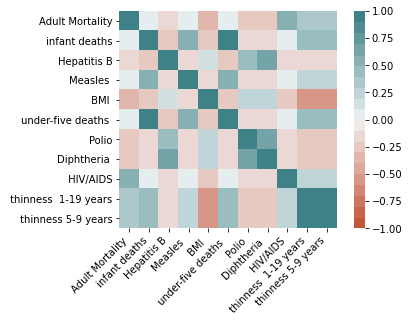

In [10]:
import seaborn as sns  # draws pretty things 🥳
health_atribs = ['Adult Mortality','infant deaths', 'Hepatitis B','Measles ', 
                 ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS', 
                ' thinness  1-19 years', ' thinness 5-9 years']
# I think of adult mortality as more of a socio-economic factor tbh, will research tho
corr = life_data[health_atribs].corr()
# TO-DO : find any beautify extensions for jupyter

# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=20, center = 'light'),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# It's beautiful
# I've looked at this for 5 hours now

In [11]:
co_rel_health = life_data[[*health_atribs, 'Life expectancy ']].corr()
print(co_rel_health['Life expectancy '].sort_values(ascending = False))

Life expectancy          1.000000
 BMI                     0.567694
Diphtheria               0.479495
Polio                    0.465556
Hepatitis B              0.256762
Measles                 -0.157586
infant deaths           -0.196557
under-five deaths       -0.222529
 thinness 5-9 years     -0.471584
 thinness  1-19 years   -0.477183
 HIV/AIDS               -0.556556
Adult Mortality         -0.696359
Name: Life expectancy , dtype: float64


In [12]:
# Under - five deaths and infant deaths are plenty related
print(np.corrcoef(life_data['infant deaths'], life_data['under-five deaths ']))
# ooooooofffff now that's co - relation
# using under-five deaths cause thats better co-related to life expectancy

[[1.         0.99662815]
 [0.99662815 1.        ]]


In [13]:
# ' thinness  1-19 years', ' thinness 5-9 years' are related too
life_data[[' thinness  1-19 years', ' thinness 5-9 years']].info()
# I am choosing to dropna here cause its only 34 NA records
# Will fill them in later tho
thin_19 = life_data[' thinness  1-19 years'].dropna()
thin_9 = life_data[' thinness 5-9 years'].dropna()
print(np.corrcoef(thin_19, thin_9))
# yes they sisters

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    thinness  1-19 years  2896 non-null   float64
 1    thinness 5-9 years    2896 non-null   float64
dtypes: float64(2)
memory usage: 68.6 KB
[[1.         0.93895266]
 [0.93895266 1.        ]]


In [14]:
# BMI seems like a good choice
print(corr[' BMI '])
# CAN just use this instead of the thiness atribs

Adult Mortality         -0.387017
infant deaths           -0.227480
Hepatitis B              0.155174
Measles                 -0.176069
 BMI                     1.000000
under-five deaths       -0.237910
Polio                    0.287579
Diphtheria               0.286077
 HIV/AIDS               -0.243735
 thinness  1-19 years   -0.530805
 thinness 5-9 years     -0.537784
Name:  BMI , dtype: float64


In [15]:
# thiness and under - five deaths seem good too
median = thin_19.median()
thin_19 = life_data[' thinness  1-19 years'].fillna(value = median)
median = thin_9.median()
thin_9 = life_data[' thinness 5-9 years'].fillna(value = median)
print(np.corrcoef(thin_19, life_data['infant deaths']))
print(np.corrcoef(thin_9, life_data['infant deaths']))

# it's good co-relation, atleast i think so
# ASK: WHAT CO-RELATION IS GOOD CO-RELATION ?

[[1.         0.46476225]
 [0.46476225 1.        ]]
[[1.         0.47046872]
 [0.47046872 1.        ]]


             Hepatitis B  Measles      Polio  Diphtheria    HIV/AIDS
Hepatitis B     1.000000 -0.121211  0.483989     0.610199  -0.113395
Measles        -0.121211  1.000000 -0.136460    -0.142174   0.030673
Polio           0.483989 -0.136460  1.000000     0.672130  -0.159914
Diphtheria      0.610199 -0.142174  0.672130     1.000000  -0.165208
 HIV/AIDS      -0.113395  0.030673 -0.159914    -0.165208   1.000000


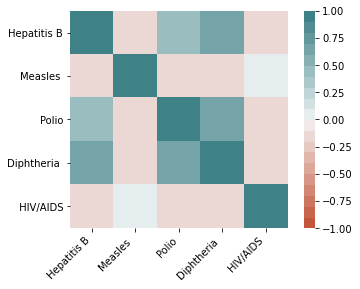

In [16]:
diseases = ['Hepatitis B','Measles ', 'Polio', 'Diphtheria ', ' HIV/AIDS']

dis_corr = life_data[diseases].corr()
print(dis_corr)
# mazikkk 🪄
ax = sns.heatmap( 
    dis_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=20, center = 'light'),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Diptheria is the best
# Polio and Measles both vibe with it
# And it's got the highest co-relation with Life-Expectancy
# can drop measles
# keeping HIV/AIDS since it's good with life expectancy we will keep it, bet no one ever said that
# ASK: CAN'T WE JUST APPLY PCA ?😭
# THIS IS TAKING TOO LONG 😭 Thats what she said 😭

In [56]:
# So from health we are keeping 
# Adult Mortality
# BMI
# HIV/AIDS
# Diptheria
# Under-five-deaths
# In decreasing order of importance
selected_health_atribs = ['Adult Mortality', ' BMI ','Diphtheria ', ' HIV/AIDS', ]

## Socio-Economic

In [31]:
socio_atribs = ['Year', 'Status', 'Life expectancy ','Alcohol', 'Income composition of resources', 'Schooling']
# ASK: HOW TO FIND CO-RELATION WITH CATEGORICAL ATTRIBUTES ?
# AGGREGATION OR SOMETHING ?
print(life_data['Status'].value_counts()) # most countries are developing duhhh
life_data.Status.fillna(value = 'Developing') # Sorta like filling in with the median
life_data['Status'].replace({'Developing':0, 'Developed': 1}, inplace = True)
print(len(life_data))
print(np.corrcoef(life_data['Status'], life_data['Life expectancy '])) # GOOD CO-RELATION

0    2416
1     512
Name: Status, dtype: int64
2928
[[1.         0.48213613]
 [0.48213613 1.        ]]


In [17]:
socio_corr = life_data[socio_atribs].corr()
# mazikkk 🪄
ax = sns.heatmap( 
    socio_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=20, center = 'light'),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# sweet the co-relations are pretty good here

NameError: name 'socio_atribs' is not defined

In [19]:
print(socio_corr['Life expectancy '].sort_values(ascending= False))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
Status                             0.482136
Alcohol                            0.404877
percentage expenditure             0.381864
Total expenditure                  0.218086
Year                               0.170033
Name: Life expectancy , dtype: float64


In [23]:
life_data.Schooling.describe() # I guess it describes the years of schooling a person recieved
schooling = life_data.Schooling.fillna(value = life_data.Schooling.median())
income_comp = life_data['Income composition of resources'].fillna(value= life_data['Income composition of resources'].median())
print(np.corrcoef(schooling, income_comp))
# It's a pretty awesome co-rel, but they are both pretty important on their own
# So not dumping any of them yet

[[1.         0.79981655]
 [0.79981655 1.        ]]


In [25]:
socio_corr['Schooling'].sort_values(ascending= False) # can't dump anything

Schooling                          1.000000
Income composition of resources    0.800046
Life expectancy                    0.751975
Alcohol                            0.548001
Status                             0.515827
percentage expenditure             0.391466
Total expenditure                  0.262511
Year                               0.213265
Name: Schooling, dtype: float64

In [26]:
socio_corr['Alcohol'].sort_values(ascending= False)
# Alcohol and status seem plenty related so we gonna use Status as it's better related to life expectancy

Alcohol                            1.000000
Status                             0.596724
Schooling                          0.548001
Income composition of resources    0.450254
Life expectancy                    0.404877
percentage expenditure             0.341112
Total expenditure                  0.302902
Year                              -0.049175
Name: Alcohol, dtype: float64

In [58]:
# Socio-Economic attributes we are considering
# Schooling
# Income composition of resources
# Status
selected_socio_atribs = ['Schooling', 'Income composition of resources', 'Status']

## Economic attributes

In [38]:
eco_atribs = list(set(life_data.columns) - set(socio_atribs) - set(health_atribs)) + ['Life expectancy ']

In [39]:
eco_atribs

['GDP',
 'Total expenditure',
 'Country',
 'percentage expenditure',
 'Population',
 'Life expectancy ']

Life expectancy           1.000000
GDP                       0.461455
percentage expenditure    0.381864
Total expenditure         0.218086
Population               -0.021538
Name: Life expectancy , dtype: float64


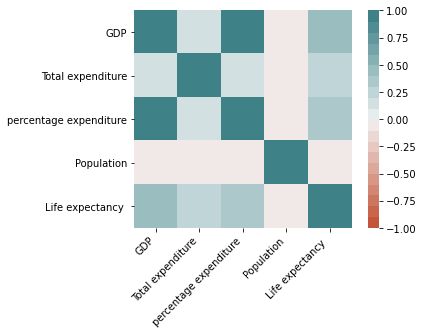

In [44]:
eco_corr = life_data[eco_atribs].corr()
print(eco_corr['Life expectancy '].sort_values(ascending = False)) # calculates co-relation for just numerical attributes
ax = sns.heatmap( 
    eco_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=20, center = 'light'),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# And I am choosing percentage expenditure since its better related to life expectancy

In [47]:
gdp = life_data['GDP'].fillna(value = life_data['GDP'].median())
percent_expend = life_data['percentage expenditure'].fillna(value = life_data['percentage expenditure'].median())
print(np.corrcoef(gdp, percent_expend))
# Jus use GDP

[[1.         0.90180324]
 [0.90180324 1.        ]]


In [50]:
total_expend = life_data['Total expenditure'].fillna(value = life_data['Total expenditure'].median())
# Jupyter is kinda ugly tbh
print(np.corrcoef(gdp, total_expend)) # heh thats smol 🙃
# so we gonna drop total_expend
# and population since it's co-relation is pretty weak
# also I don't know how to handle the country categorical attribute yet
# So I am not gonna use it
# GDP is a pretty good indicator of a country, so like po-ta-to po-tah-to

[[1.         0.11370293]
 [0.11370293 1.        ]]


In [59]:
# Toh abi Economic attributes that we are keeping are :
# GDP
# Percent expenditure
selected_eco_atribs = ['GDP', 'percentage expenditure']

In [62]:
selected_features = selected_socio_atribs + selected_eco_atribs + selected_health_atribs

In [64]:
print(len(selected_features)) # 10 is a good number
selected_features

10


['Schooling',
 'Income composition of resources',
 'Status',
 'GDP',
 'percentage expenditure',
 'Adult Mortality',
 ' BMI ',
 'under-five deaths ',
 'Diphtheria ',
 ' HIV/AIDS']

In [69]:
final_corr = life_data[[*selected_features, 'Life expectancy ']].corr() 
# I hate how columns are spelled in this dataset
print(final_corr['Life expectancy '].sort_values(ascending = False))

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Status                             0.482136
Diphtheria                         0.479495
GDP                                0.461455
percentage expenditure             0.381864
under-five deaths                 -0.222529
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


# Preprocessing

In [78]:
selected_data = life_data[[*selected_features, 'Life expectancy ']]

In [79]:
# we gotta split our things, thats what she said🥲
# do it first to prevent any bias
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(selected_data, test_size = 0.2, random_state = 1)

In [80]:
train_set.columns

Index(['Schooling', 'Income composition of resources', 'Status', 'GDP',
       'percentage expenditure', 'Adult Mortality', ' BMI ',
       'under-five deaths ', 'Diphtheria ', ' HIV/AIDS', 'Life expectancy '],
      dtype='object')

In [82]:
train_set['Life expectancy '].describe()

count    2342.000000
mean       69.262724
std         9.551600
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [84]:
life = train_set.drop(['Life expectancy '], axis = 1)
life_labels = train_set['Life expectancy ']

In [85]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 1131 to 1063
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        2212 non-null   float64
 1   Income composition of resources  2212 non-null   float64
 2   Status                           2342 non-null   int64  
 3   GDP                              1989 non-null   float64
 4   percentage expenditure           2342 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6    BMI                             2315 non-null   float64
 7   under-five deaths                2342 non-null   int64  
 8   Diphtheria                       2326 non-null   float64
 9    HIV/AIDS                        2342 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 201.3 KB


In [86]:
# gotta get rid of NA's first
# I am just gonna fill them in with the median
# If there's something wrong with it please tell me about it
def fill_with_median(df): # assuming all attributes of the dataframe are numerical
    for column in df:
        median = df[column].median()
        df[column].fillna(value = median, inplace = True)
    return df

In [87]:
fill_with_median(life)

In [89]:
life.info()
# All filled up 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 1131 to 1063
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Schooling                        2342 non-null   float64
 1   Income composition of resources  2342 non-null   float64
 2   Status                           2342 non-null   int64  
 3   GDP                              2342 non-null   float64
 4   percentage expenditure           2342 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6    BMI                             2342 non-null   float64
 7   under-five deaths                2342 non-null   int64  
 8   Diphtheria                       2342 non-null   float64
 9    HIV/AIDS                        2342 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 201.3 KB


array([[<AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'Income composition of resources'}>,
        <AxesSubplot:title={'center':'Status'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>],
       [<AxesSubplot:title={'center':' BMI '}>,
        <AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Diphtheria '}>],
       [<AxesSubplot:title={'center':' HIV/AIDS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

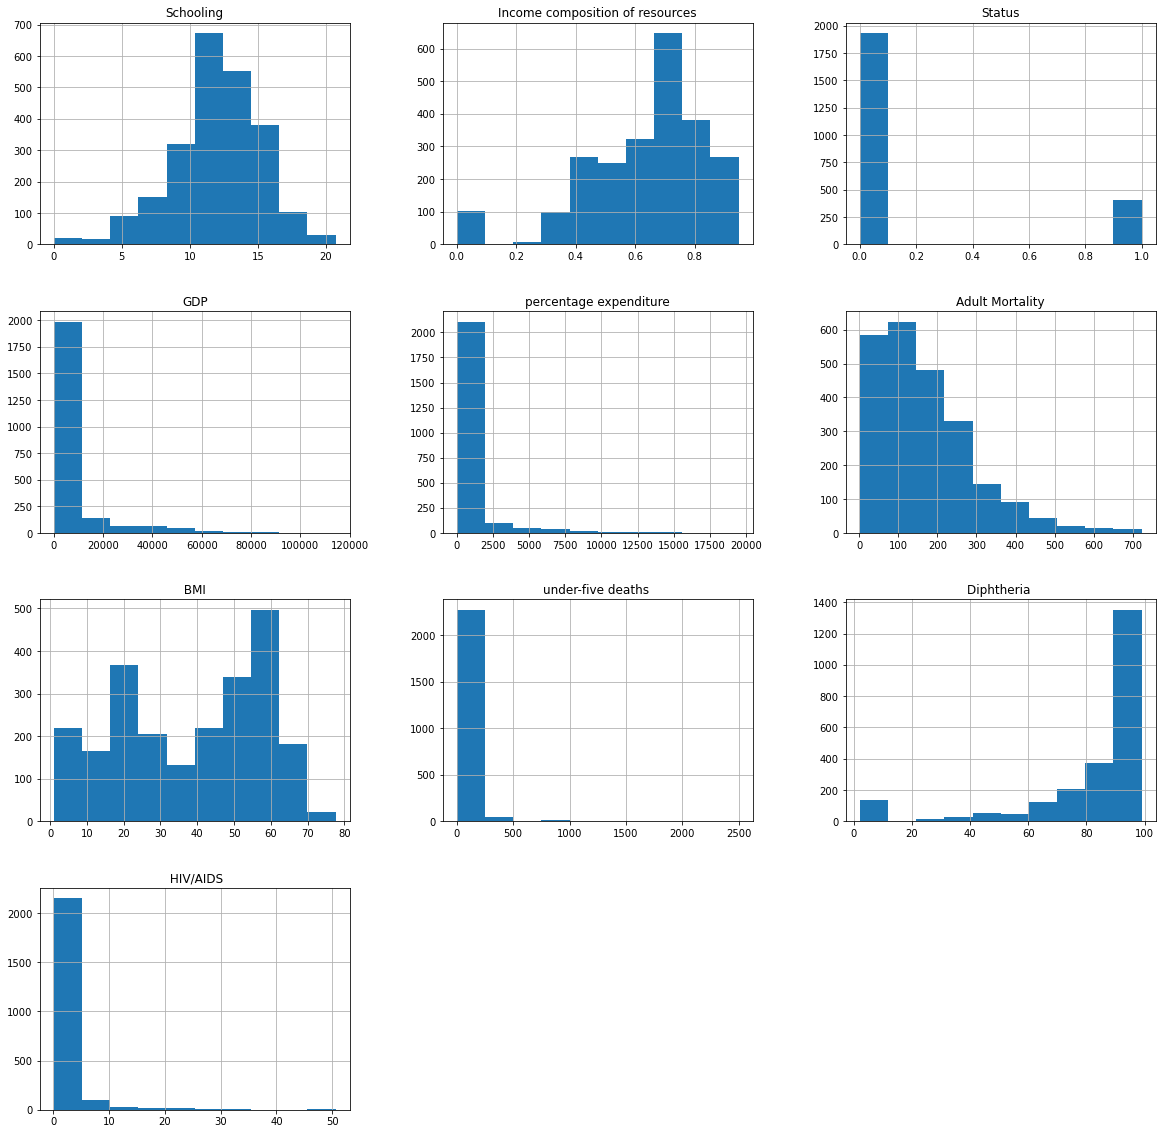

In [91]:
# now we gotta standardise them
# Find the normal distributions
life.hist(figsize=(20,20))


In [118]:
def standardise(df):
    std = df.std()
    mean = df.mean()
    return (df - mean) / std

def normalise(df):
    min_df = df.min()
    max_df = df.max()
    return (df - min_df)/(max_df - min_df)

def scale(data, normal_dist, not_normal): # This is not really general
    for column in normal_dist:
        data[column] = standardise(data[column])
        data[column] = normalise(data[column])
    for column in not_normal:
        data[column] = normalise(data[column])
    return data

In [121]:
normal_dist = ['Schooling', 'Income composition of resources', 'Adult Mortality']
not_normal = list(set(selected_features) - set(normal_dist))
life_prepared = scale(life, normal_dist, not_normal)

In [122]:
life_prepared.describe()
# Hey how doo we combine standard scaled and normalised data
# So, what i figured is that we can just normalise the standardised data cause it's just scaling down right

,Schooling,Income composition of resources,Status,GDP,percentage expenditure,Adult Mortality,BMI,under-five deaths,Diphtheria,HIV/AIDS
count,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000,2342.000000
mean,0.580030,0.664710,0.175491,0.058596,0.038300,0.225878,0.487747,0.016225,0.828030,0.032712
std,0.158009,0.216500,0.380468,0.114823,0.099931,0.172967,0.258405,0.061623,0.243957,0.100331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.497585,0.529800,0.000000,0.004949,0.000241,0.101108,0.241514,0.000000,0.783505,0.000000
50%,0.594203,0.714135,0.000000,0.015462,0.003278,0.195291,0.552219,0.001600,0.938144,0.000000
75%,0.684783,0.816456,0.000000,0.042959,0.023465,0.311634,0.718016,0.010800,0.979381,0.013861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression

In [123]:
# So now we gotta do linear regression I guess
# training a linear regression model
# I'm not trying to implement one manually, I could tho if it matters
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(life_prepared, life_labels)

LinearRegression()

In [128]:
# Now we gotta test our model
# Please be good 
test_data, test_labels = test_set.drop(['Life expectancy '], axis = 1), test_set['Life expectancy ']
fill_with_median(test_data)
test_prepared = scale(test_data, normal_dist, not_normal)
predicted_labels = lin_reg_model.predict(test_prepared)

In [133]:
# The mean squared error is :-
print('The root mean squared error is :-')
print((np.sum((predicted_labels - test_labels)**2)/len(test_labels))**0.5)
# It's pretty good for a first model I guess heh

The root mean squared error is :-
4.211138565139876
